# 데이터 분석 시작해보자

본 커널은 DHH(Digital Health Hack)에 참가하게 되어 기초가 부족한 상태에서 다른 팀원분들의 진행 과정을 최소한이라도 이해하고 따라가기 위해 학습하는 과정을 기록한 커널입니다.

### Reference

해당 커널은 아래 링크의 멋지고 환상적인 분석을 해주신 곽대훈님의 캐글 커널을 참고하였습니다.

[Kaggle 공개 커널, 곽대훈님의 데이터 분석 어떻게 시작해야 하나요?](https://www.kaggle.com/daehungwak/guide-kor-dg/notebook)

참고한 튜토리얼의 프로세스 진행에 맞춰 학습하였습니다.

##### 참고 커널의 진행 과정
1. 데이터 셋 확인
2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)
3. 특성 공학 (Feature Engineering)
4. 모델 개발 및 학습
5. 모델 예측 및 평가

## 1. 데이터 셋 확인

일단 필요한 패키지(라이브러리)들을 import 합니다.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)

위의 코드는 참고 커널의 필자가 항상 쓰는 방법이라고 합니다.

matplotlib의 기본 schema 말고 seaborn의 scheme를 세팅하여 사용하면 편하다고 합니다.

In [4]:
import missingno as msno
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
os.listdir('./input')

['test.csv', 'train.csv', 'gender_submission.csv']

필요한 파일들을 root 경로에서 `input` 폴더를 생성하고 생성한 폴더로 옮겨주었습니다.

`os.listdir` 메소드를 이용하여 확인해보았습니다.

In [6]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
df_submit = pd.read_csv('./input/gender_submission.csv')

In [7]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

In [8]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [13]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
df_submit.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


각 `csv` 파일들을 **pandas** 패키지의 `read_csv` 메소드를 통해 읽어 저장하고 저장된 데이터를 `colums`으로 **Feature**들을 확인하고, `shape`, `head`, `describe` 등의 메소드를 통해 살펴보았습니다.

+ **shape** : DataFrame의 (row num, column num)을 반환해줍니다.
+ **head** : 데이터의 row를 index 오름차순으로 정렬했을 때 상위 5개의 row를 보여줍니다.
+ **describe** : DataFrame의 각 feature가 가지는 통계치를 반환해줍니다.

### 1.1 결측치 확인

In [16]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [17]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

**train set**과 **test set**의 feature별 결측치(데이터가 null인 비율)을 확인해보았습니다.

`Age` feature와 `Cabin` feature에 각 약 20%, 약78%의 결측치가 있음을 볼 수 있습니다.

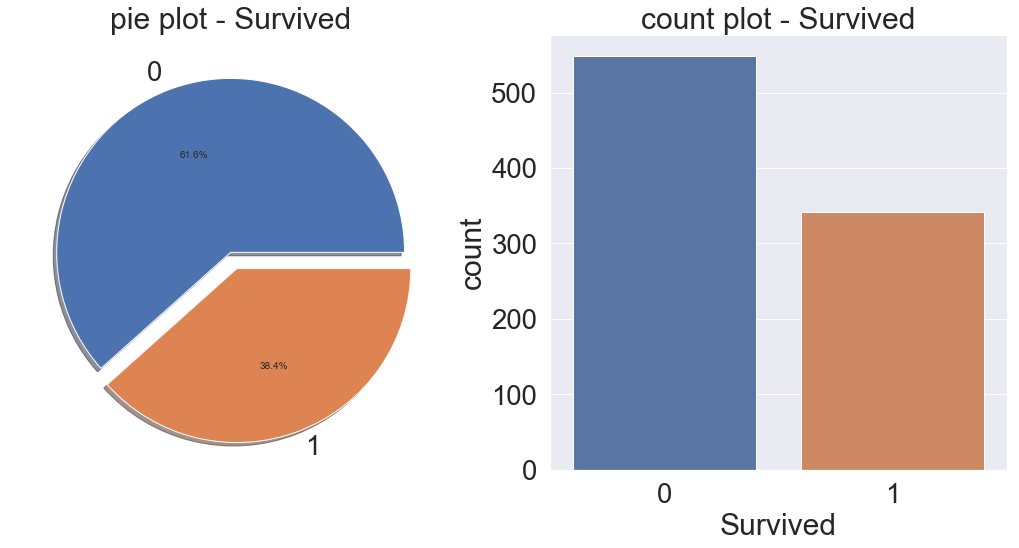

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('count plot - Survived')

plt.show()

우리의 목표는 **Test set** 데이터에 존재하는 Passenger의 `Survived` 값이 0인지 1인지를 예측하는 것입니다.

먼저 **Train set** 데이터에서 `Survived` feature의 비율을 확인해보았습니다.

0인 값이 61.6%, 1인 값이 38.4%의 비율로 생존한 비율이 더 낮다는 걸 볼 수 있습니다.

## 2. 탐색적 데이터 분석(EDA, Exploratory Data Analysis)

이제 어떤 feature가 `Survived`에 얼마나 영향을 미치는지 확인해보아야 합니다.

이를 위해서는 적절한 시각화가 필요합니다.

시각화 패키지는 `matplotlib`, `seaborn`, `plotly` 등이 있습니다.

본 커널에서는 `matplotlib`와 `seaborn`을 주로 사용할 것 입니다.

### 2.1 Pclass

가장 먼저 Pclass feature를 살펴봅시다.

Pclass는 **서수**(순서가 있는 수)형 데이터입니다. 즉, 카테고리 역할을 동시에 하는 데이터입니다.

pandas의 DataFrame에서는 SQL 쿼리의 groupby와 같은 `groupby` 메소드를 사용하면 쉽게 데이터를 묶어 볼 수 있습니다.

경우에 따라서는 [pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)이라는 메소드를 사용해도 유용합니다.

In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [20]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [21]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [22]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


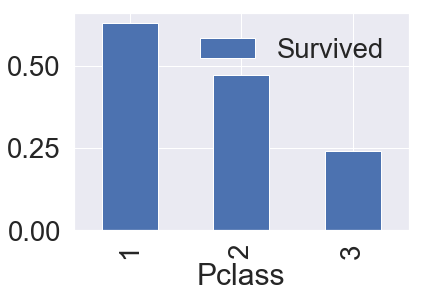

In [23]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

`groupby` 메소드를 이용하여 출력된 table을 보아도 **Pclass** feature가 **Survived**값에 큰 영향을 마친다고 확인 할 수 있습니다.

`plot.bar` 메소드를 통해 막대 그래프로 시각화하니 더 확실하게 알 수 있습니다.

### 2.2 Sex

이제 **Sex** feature를 확인해봅시다.

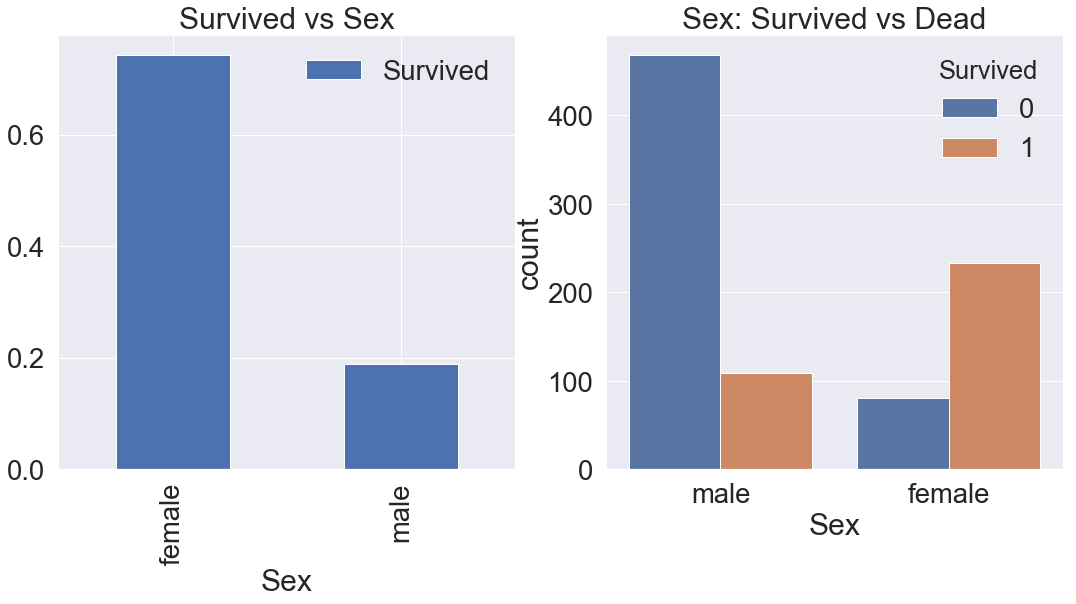

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

좌측의 막대 그래프를 보면 생존자 중 female인 passenger가 male인 passenger가 월등히 많음을 확인 할 수 있으며

각 Sex별 생존, 사망자 수를 비교해보아도 female인 passenger는 생존자가 더 많았으나 male인 passenger는 사망자가 더 많음을 확인 할 수 있었습니다.

이를 통해 **Sex** feature도 **Survived**에 큰 영향을 끼친다는 것을 알 수 있습니다.

### 2.3 Both Sex and Pclass

이번에는 Sex, Pclass 두 feature에 관해 생존이 어떻게 변화하는지 확인해봅시다.


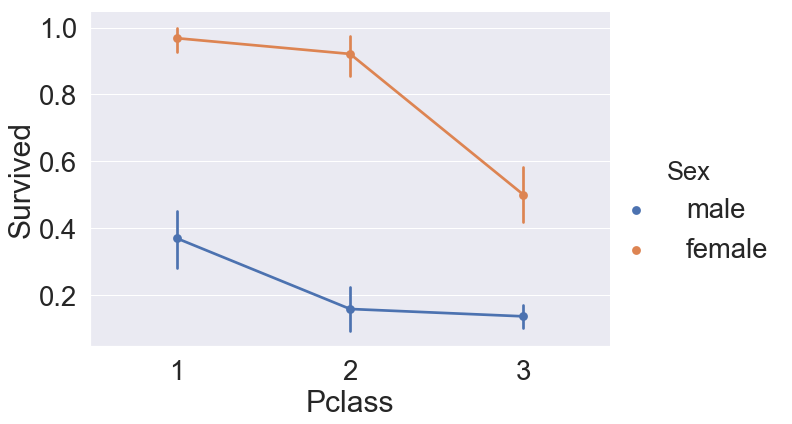

In [26]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

모든 Pclass, Sex에서 생존률이 male보다 female에 높음을 볼 수 있습니다.

### 2.4 Age

이번에는 **Age** feature에 대해 조사해봅시다.

In [35]:
print('age of oldest passenger: {:.1f} Years'.format(df_train['Age'].max()))
print('age of youngest passenger: {:.1f} Years'.format(df_train['Age'].min()))
print('average of passenger`s age: {:.1f} Years'.format(df_train['Age'].mean()))

age of oldest passenger: 80.0 Years
age of youngest passenger: 0.4 Years
average of passenger`s age: 29.7 Years


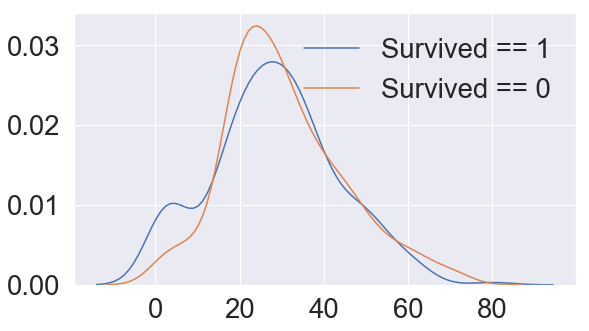

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])

plt.show()

가장 나이가 많은 passenger는 80세, 가장 어린 passengersms 0.4세이며, passenger의 평균 나이는 29.7세입니다.

`seaborn`의 커널 밀도 분포를 곡선 그래프로 볼 수 있는 `kdeplot` 메소드를 이용하여 살펴본 결과, 전체적인 구간에서는 나이가 생존에 관계가 없어보이나 15세 미만 구간에서 특별하게 생존률이 높음을 확인할 수 있습니다.

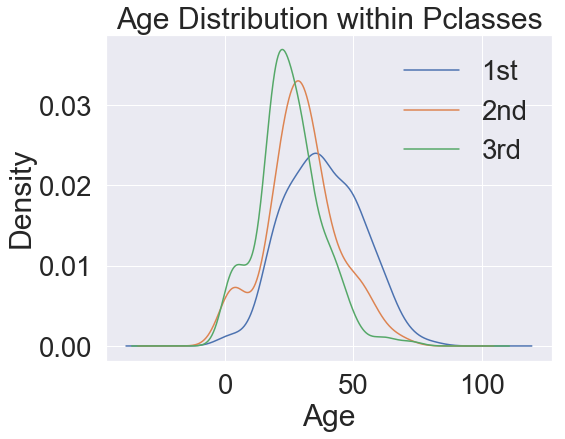

In [27]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within Pclasses')
plt.legend(['1st', '2nd', '3rd'])

plt.show()

`kdeplot`을 통해 확인해보니 나이가 높을 수록 **Pclass**가 높습니다.

이젠 나이대가 높아짐에 따라 생존률 변화를 알기 위해 누적 확률을 활용한 시각화를 해봅시다.

+ 누적 확률 개념 참고 : [ratsgo님의 정규분포 누적분포함수와 중심극한정리](https://ratsgo.github.io/statistics/2017/06/27/normal/)

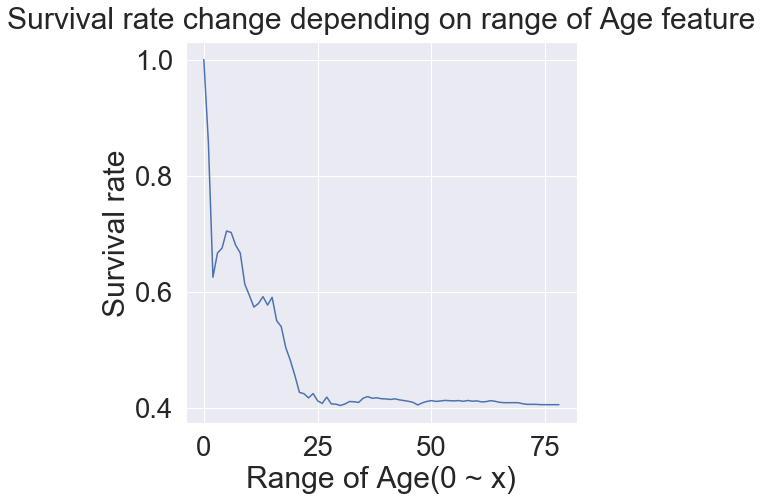

In [30]:
cumulate_survive_ratio = []
for i in range(1, 80):
    cumulate_survive_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cumulate_survive_ratio)
plt.title('Survival rate change depending on range of Age feature', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0 ~ x)')
plt.show()

누적 확률을 통해 보았을 때 나이가 낮을 수록 생존률이 확실히 높은 것을 볼 수 있습니다.

나이도 중요한 feature입니다.

지금까지의 분석을 통해 얻은 정보를 정리하면

1. 여자이거나
2. 나이가 어리거나
3. Pclass가 높을 수록(값이 낮을 수록)

생존률이 높음을 확인했습니다.

### 2.5 Embarked

**Embarked** feature는 passenger가 승선한 항구를 나타냅니다.
- C : Cherbourg
- Q : Queenstown
- S : Southampton

**Embarked** feature를 조사해봅시다.

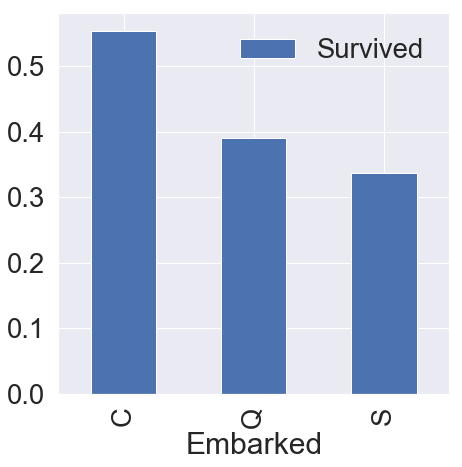

In [32]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar(figsize=(7, 7))

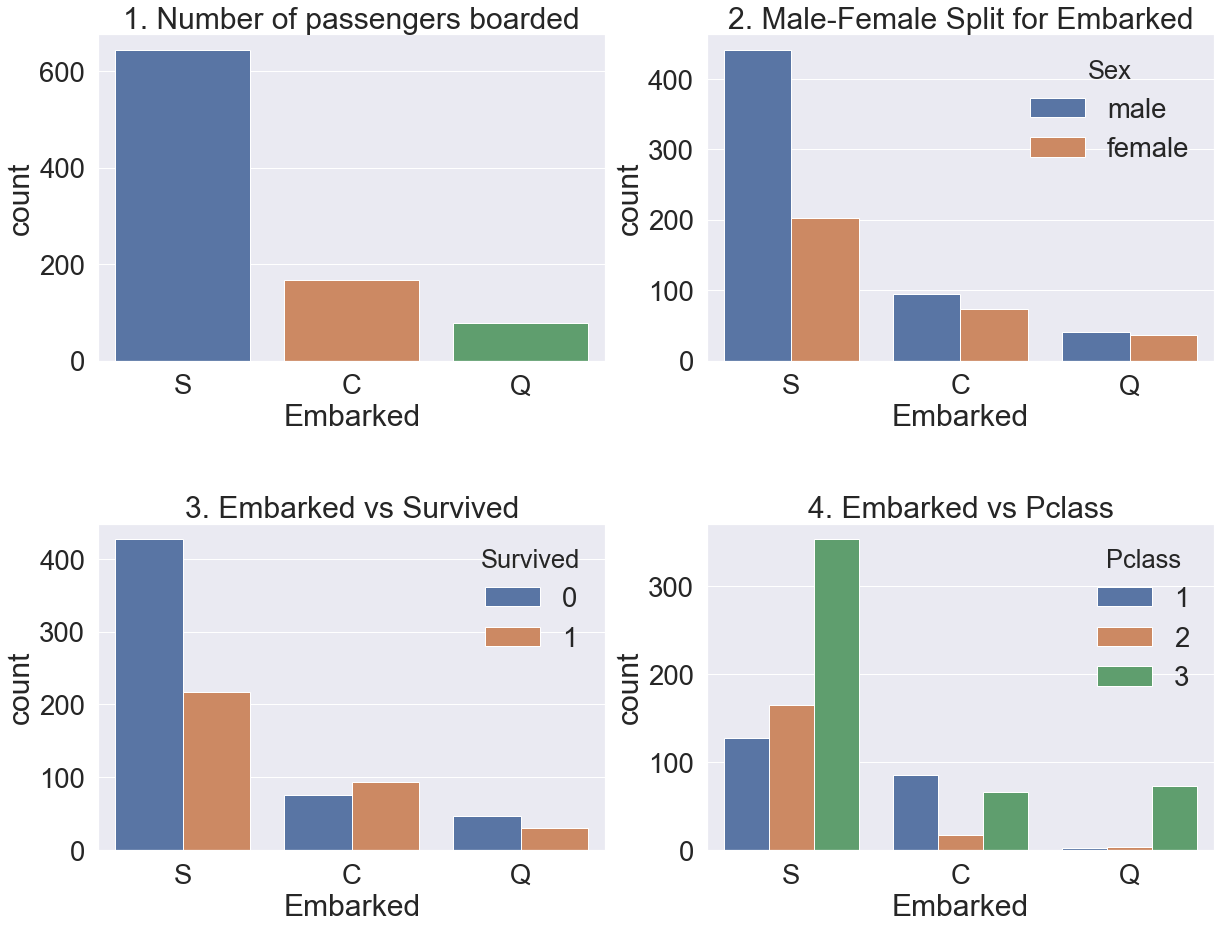

In [36]:
# 단순 Embarked feature에 따른 passenger 수를 막대 그래프로 시각화
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('1. Number of passengers boarded')
# Sex feature를 카테고리로 막대 그래프 시각화
sns.countplot('Embarked', data=df_train, hue='Sex', ax=ax[0, 1])
ax[0, 1].set_title('2. Male-Female Split for Embarked')
# Embarked feature별 생존, 사망 수를 막대 그래프로 시각화
sns.countplot('Embarked', data=df_train, hue='Survived', ax=ax[1, 0])
ax[1, 0].set_title('3. Embarked vs Survived')
# 각 Embarked 별 Pclass 수를 막대 그래프로 시각화
sns.countplot('Embarked', data=df_train, hue='Pclass', ax=ax[1, 1])
ax[1, 1].set_title('4. Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5) # figure가 겹치지 않게 간격 조절
plt.show()

+ Figure 1 - S(Southampton)에서 가장 많은 승객이 탑승했씁니다.
+ Figure 2 - C(Cherbourg)와 Q(Queenstown)은 남녀 비율이 비슷하고 S는 남자가 더 많습니다.
+ Figrue 3 - S의 경우 생존률이 특히 낮은 것을 볼 수 있습니다.
+ Figure 4 - 이전 **Pclass** feature를 분석한 결과를 생각해보면 S에서 탑승한 Passenger가 Pclass가 낮은 승객 비율이 많기 때문에 생존확률이 낮게 나온 것으로 보입니다.

### 2.6 Family - SibSp + Parch

**Sibsp**(형제, 자매) feature와 **Parch**(부모, 자녀) feature를 합치면 같이 탑승한 가족의 수가 됩니다.

이 두 feature를 합쳐 **Family**라는 새로운 feature를 만들어서 생각해봅시다.

In [38]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 본인도 가족이기에 더해줍니다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [39]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


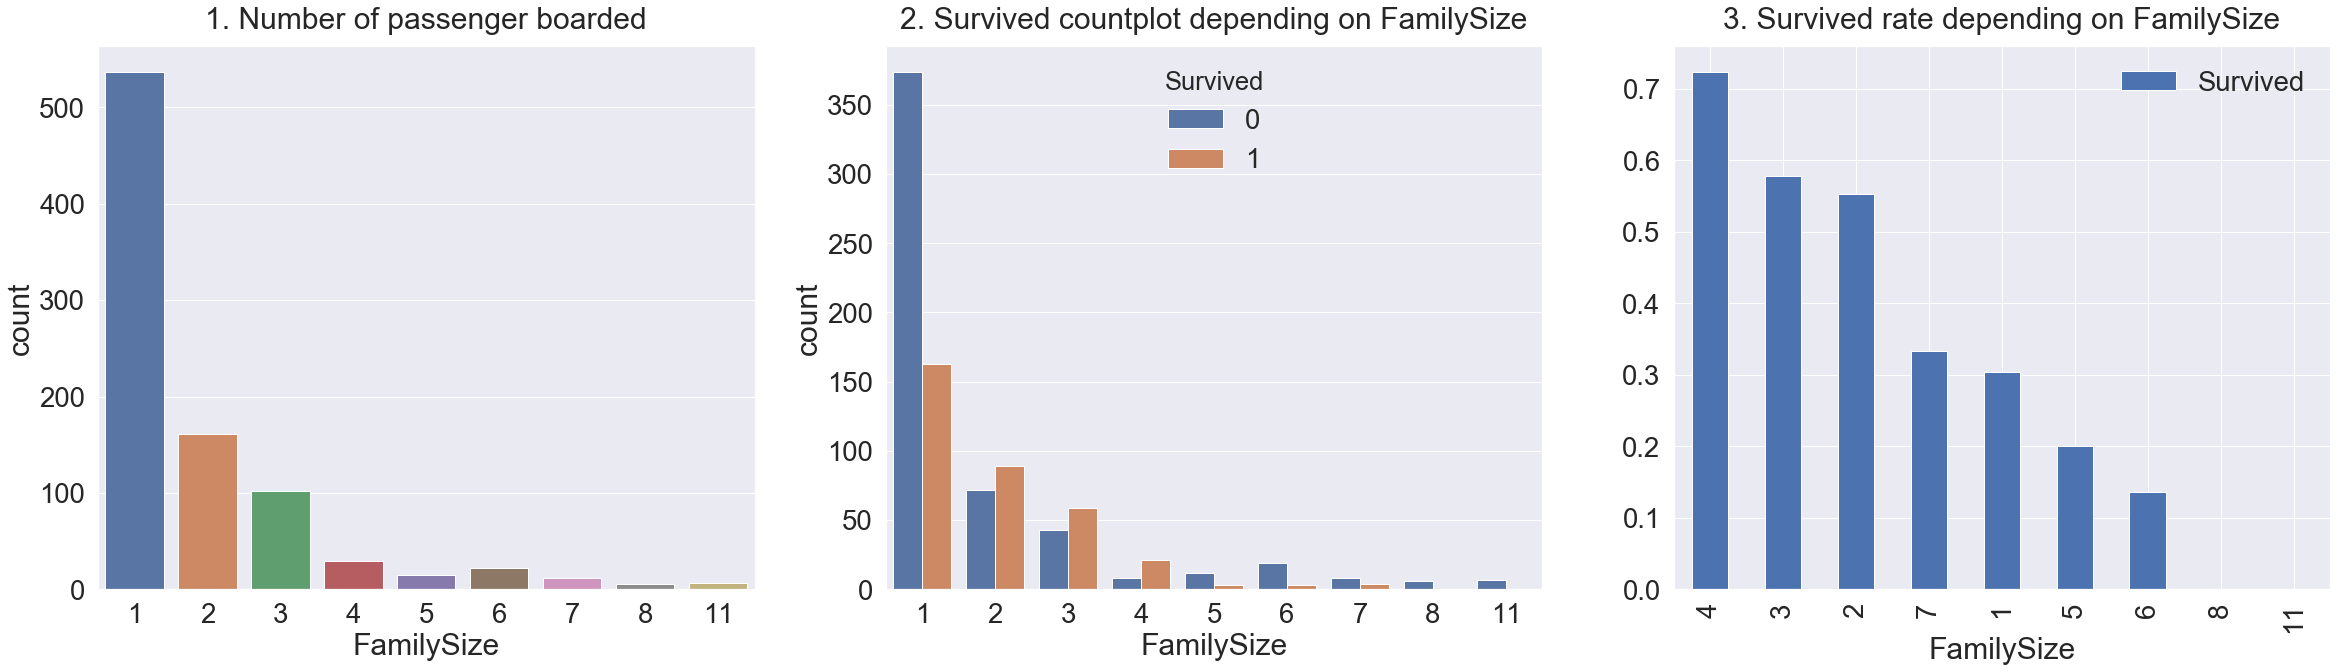

In [41]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('1. Number of passenger boarded', y=1.02)
sns.countplot('FamilySize', data=df_train, hue='Survived', ax=ax[1])
ax[1].set_title('2. Survived countplot depending on FamilySize', y=1.02)
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('3. Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

+ Figure 1 - 혼자서 탑승한 passenger가 가장 많고 그 다음으론 순서대로 2, 3, 4명입니다.
+ Figure 2, 3 - 2, 3, 4명 단위로 탑승한 가족의 경우 생존 비율이 더 높았고 그 외에는 사망률이 더 높습니다. 또한, 가족수가 너무 작거나 크면 생존률이 떨어지는 것을 확인할 수 있습니다. 2~4명의 경우 생존률이 가장 높습니다.

### 2.7 Fare

**Fare** feature는 탑승 요금입니다.

해당 feature는 연속 데이터이므로 histogram을 통해 시각화해봅시다.

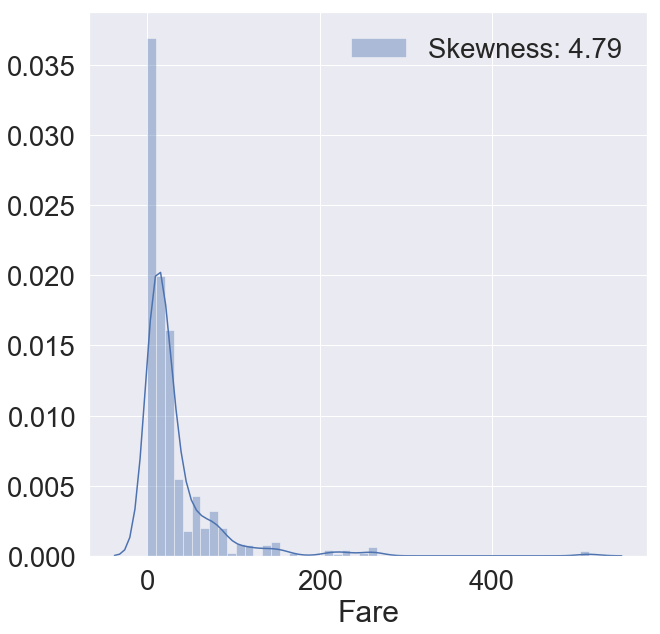

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

plt.show()